## Pittingdetektion auf Kugelgewindetrieben (Gruppe: KGT-1)

### Data Understanding & Preparation

In [57]:
#import packages
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#for use in colab import:
#from google.colab import drive

In [59]:
#define the data directories

#for use in colab --> upload data in own Drive
#cd = '/content/gdrive/My Drive/Colab Notebooks'
#folder_path = os.path.join(cd,  'data')

#for use in local IDE
current_dir = os.getcwd()
cd = os.path.dirname(current_dir)
folder_path = os.path.join(current_dir,  'data')

In [60]:
#define class labels
class_labels = ['KGT_noDefect', 'KGT_pitting']

#function to load data, get labels and perform preprocessing
def load_classes(class_labels,folder_path):
    # Define the image dimensions
    img_height = 150
    img_width = 150

    # Define the data arrays
    x_total = []
    labels = []

    for class_label in class_labels:
        class_path = os.path.join(folder_path, class_label)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                if img_path.endswith('.png'):
                    img = cv2.imread(img_path)
                    #convert image to black and white
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    #convert all images to correct dimensions
                    img = cv2.resize(img, (img_height, img_width))
                    #normalize pixel values
                    img = img / 255.0
                    x_total.append(np.asarray(img).reshape(img_height, img_width, 1))
                    labels.append(class_label)
    return np.array(x_total), np.array(labels)


x_total, labels = load_classes(class_labels, folder_path)

#encode the labels as integers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(labels)

(17908, 150, 150, 1)
(17908,)
(array([0, 1]), array([ 7141, 10767]))


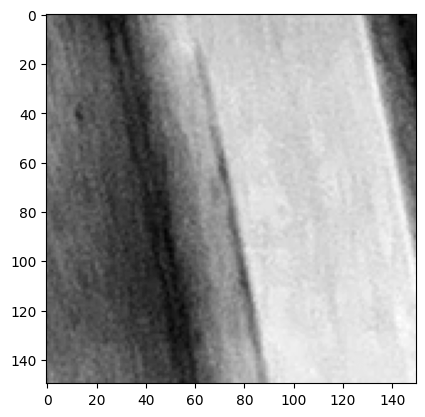

In [61]:
#get an overview over the preprocessed data
print(x_total.shape)
print(y_encoded.shape)

#get size of classes
print(np.unique(y_encoded, return_counts=True))

#print image
img_num = random.randint(0, 17908)
img = x_total[img_num] 
img_label = y_encoded[img_num] 
plt.imshow(img.reshape(150, 150), cmap = 'gray') 


In [11]:
#for training: split data
x_train, x_test, y_train, y_test = train_test_split(x_total, y_encoded, test_size=0.2, random_state=42)

### Data Augmentation

In [12]:
#import packages
from keras import preprocessing

In [13]:
#create an ImageDataGenerator and specify the augmentation parameters

datagen = preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range = [-2,-1, 0, +1, +2],
    height_shift_range = [ -1, 0, +1],
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
    )

### Model architecture

In [14]:
#import packages

from keras import layers, models, optimizers
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [15]:
#define used hyperparameters

epochs = 10
batch_size = 16
dropout2 = 0.1
dropout3 = 0.1
learningrate = 0.001
num_filters = 32

In [16]:
#model architecture

model = models.Sequential()
model.add(layers.Conv2D(num_filters, (7, 7), strides= (2,2), padding='same', activation='relu', input_shape=(150, 150, 1)))
model.add(layers.Conv2D(num_filters*2, (3, 3), padding='same', activation='relu'))
model.add(layers.Dropout(dropout2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(num_filters*4, (3, 3), padding='same', activation='relu'))
model.add(layers.Dropout(dropout3))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
   
model.compile(optimizer=optimizers.Adam(learning_rate=learningrate, decay=0.02), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
#train and save the model

model.fit_generator(datagen.flow(x_train, y_train,  batch_size=batch_size, subset='training'), epochs=epochs, validation_data=datagen.flow(x_train, y_train))

model_name = f"projekt_1_gruppe_1_nf.h5"
model.save(os.path.join(cd, 'finale Abgabe', model_name))

/var/folders/5_/1vb9hqy12n79bzx8wws2wkd80000gn/T/ipykernel_32529/425732834.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train, y_train,  batch_size=batch_size, subset='training'), epochs=epochs, validation_data=datagen.flow(x_train, y_train))


Epoch 1/10


2023-07-21 19:05:47.007295: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


717/717 [==============================] - ETA: 0s - loss: 0.4860 - accuracy: 0.7719

2023-07-21 19:08:26.546208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


717/717 [==============================] - 207s 287ms/step - loss: 0.4860 - accuracy: 0.7719 - val_loss: 0.4309 - val_accuracy: 0.8290
Epoch 2/10
717/717 [==============================] - 205s 286ms/step - loss: 0.4021 - accuracy: 0.8271 - val_loss: 0.4032 - val_accuracy: 0.8433
Epoch 3/10
717/717 [==============================] - 196s 273ms/step - loss: 0.3799 - accuracy: 0.8397 - val_loss: 0.3783 - val_accuracy: 0.8448
Epoch 4/10
717/717 [==============================] - 224s 312ms/step - loss: 0.3690 - accuracy: 0.8486 - val_loss: 0.3697 - val_accuracy: 0.8564
Epoch 5/10
717/717 [==============================] - 210s 293ms/step - loss: 0.3591 - accuracy: 0.8550 - val_loss: 0.3693 - val_accuracy: 0.8553
Epoch 6/10
717/717 [==============================] - 208s 290ms/step - loss: 0.3509 - accuracy: 0.8554 - val_loss: 0.3558 - val_accuracy: 0.8603
Epoch 7/10
717/717 [==============================] - 216s 302ms/step - loss: 0.3447 - accuracy: 0.8610 - val_loss: 0.3504 - val_accura

### Model Evaluation

In [18]:
#import packages

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score, auc
import matplotlib.pyplot as plt

In [19]:
#get predicted values and true values to create boolean arrays

y_pred_prob = model.predict(x_test)
y_pred = y_pred_prob >= 0.5 #number sets class boundary (changable)
y_test_boolean = y_test >= 0.5

112/112 [==============================] - 10s 87ms/step


In [20]:
#show different performance metrics

print("Precision: ", precision_score(y_test_boolean, y_pred))
print("Recall:    ", recall_score(y_test_boolean, y_pred))
print("F1-score:  ", f1_score(y_test_boolean, y_pred))
print("Accuracy:  ", accuracy_score(y_test_boolean, y_pred))

Precision:  0.845699831365936
Recall:     0.9321561338289963
F1-score:   0.8868258178603007
Accuracy:   0.8570630932439978


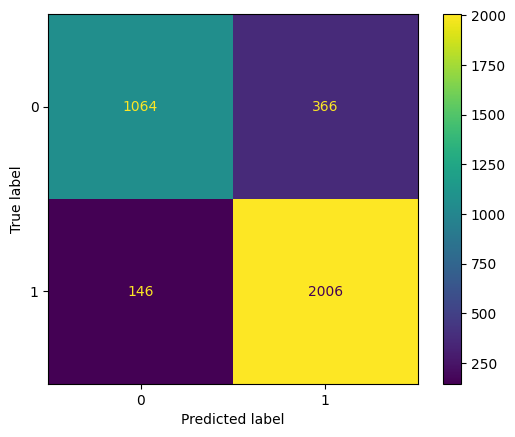

In [21]:
#show confusion matrix

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

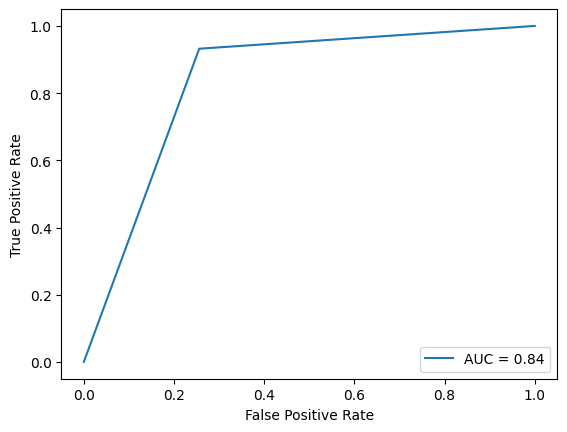

In [22]:
#show ROC curve

fpr, tpr, thresholds = roc_curve(y_test_boolean, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

display.plot()
plt.show()

### Deployment

In [23]:
def apply_model_to_video(video_path, model, center=(790, 570)):
    # Load video
    cap = cv2.VideoCapture(video_path)

    # Define the dimensions of the region of interest
    img_height = 150
    img_width = 150
    x, y = center

    detection_made = False  # Flag to track if detection has been made

    while True:
        # Read the next frame from the video
        ret, frame = cap.read()

        # Stop if no more frames are available
        if not ret:
            break

        #define model input
        pred_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #cuts out the part of the image that is indicated with frame in video
        pred_img = pred_img[(y - img_width//2):(y + img_width//2), (x-img_width//2):(x + img_height//2)] 
        pred_img = pred_img / 255.0   
        pred_img = cv2.resize(pred_img, (img_height, img_width)) 
        
        #prints image to see what the input for the model is
        #cv2.imshow('Prediction image', pred_img) 

        # Apply the model to the preprocessed frame
        pred_prob = model.predict(tf.expand_dims(pred_img, axis=0)) 

        #define probabilities for traffic light alert system
        red = 0.7
        yellow = 0.5

        if pred_prob > red:
            pred = "Pitting"
        elif pred_prob > yellow:
            pred = "Check Pitting"
        else: pred = "No Pitting"

        # define label for ROI with prediction probability and class
        label = pred + " | " + str(pred_prob)

        if pred == "Pitting" or pred == "Check Pitting":
            detection_made = True

        #define color of frame depending on probability
        if pred_prob > red:
            color = (0,0, 255)
        elif pred_prob > yellow:
            color = (0, 255, 255)
        else: color = (0,255, 0)
        
        #draw the prediction label on the frame
        cv2.putText(frame, label, (x - img_width, y + img_height // 2 + 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)
        cv2.rectangle(frame, (x-img_width//2, y-img_height//2),
                             (x+img_width//2, y+img_width//2),
                               color = color, thickness=4)

        #display the frame
        cv2.namedWindow('Pitting Video', cv2.WINDOW_NORMAL)  # Create a named window
        cv2.resizeWindow('Pitting Video', 800, 600)  # Resize the window
        cv2.imshow('Pitting Video', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break


    #release the video capture and close all windows
    cap.release()
    cv2.destroyAllWindows()

    if detection_made:
        print("Detection made!")
    else:
        print("No detection made.")


In [29]:
#perform deployment
#define the data directories
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
folder_path = os.path.join(current_dir,'data','deployment_videos')
video_path = os.path.join(folder_path, 'pitting_video.mp4')

#load the saved model if neccessary
#model on simplified data performs better on video than model whole data set
#from keras.models import load_model
model = load_model(os.path.join(current_dir, 'models', 'model_V8.1_rotation_shift_flip.h5'))

apply_model_to_video(video_path, model)

1/1 [==============================] - 0s 23ms/step
Detection made!
